Quadratic parameters:
0.12061
0.11359
0.01483
0.06930
0.03926
0.12295
-0.02884
0.00778
0.09155
0.12990
0.01918
0.07747
-0.00732
0.00468
0.11440
0.07640
Loss function for quadratic is: 0.0030927346261250786
Number of zero parameters for quadratic: 3

Quadratic graph:


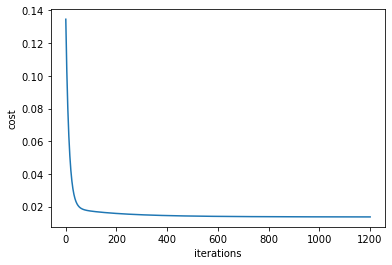

In [1]:
#Gradient descent with quadratic regularisation
import numpy as np
import matplotlib.pyplot as plt

#Loading quadratic data 
qdata = np.loadtxt('data.txt')
X = np.array(qdata[:, 1:16])
y = np.array(qdata[:, 16], ndmin=2).T

# The number of features.
n = X.shape[1]

for i in range(n):
    X[:, i] = ( X[:, i]-np.min(X[:, i]) ) / ( np.max(X[:, i])-np.min(X[:, i]) )
y = ( y-np.min(y) ) / ( np.max(y)-np.min(y) )

#Partioning quadratic data
qtrain_X = X[0:48, :]
qtest_X = X[48:60, :]

qtrain_y = y[0:48]
qtest_y = y[48:60]

m = qtrain_X.shape[0]

# Adding 1s into the feature matrix.
qtrain_X = np.concatenate( (np.ones((m,1)), qtrain_X), axis=1 )

s = qtest_X.shape[0]
qtest_X = np.concatenate( (np.ones((s,1)), qtest_X), axis=1 )

para = np.zeros((n+1,1))
lr = 0.01
ep = 0.001
la = 5

# Train data loss function with regularisation
def loss(X, y, para, la):
    part = y-np.dot(X, para)
    cost = 1/(2*m)*np.dot(part.T, part) + la/(2*m)*np.dot(para.T, para)
    return cost.item()

# Test data squared loss without regularisation.
def test_loss(X, y, para):
    part = y-np.dot(X, para)
    testLoss = 1/(2*m)*np.dot(part.T, part)
    return testLoss.item()

# The gradient algorithm.
def gradientDescent(X, y, lr, ep, la):
    m = X.shape[0]
    n = X.shape[1]
    para = np.zeros((n,1))
    new_para = np.zeros((n,1))
    costHistory = []
    costHistory.append(loss(X, y, para, la))
    k = 0
    while True:
        h = (np.dot(X, para)-y).T # compute the predictions of all training examples.
        for j in range(n):
            grad = 1/m*np.dot(h, X[:, j]) + la/m*para[j]
            new_para[j] = para[j] - lr*grad 
        para = new_para
        costHistory.append(loss(X, y, para, la))
        k = k+1
        # convergence critrion
        if abs(costHistory[k-1]-costHistory[k])*100/costHistory[k-1] < ep:
            break
    return costHistory, para

qcost, qpara = gradientDescent(qtrain_X, qtrain_y, lr, ep, la)
qtestLoss = test_loss(qtest_X, qtest_y, qpara)

# Printing parameters and count of 0 parameters
count = 0
x = qpara.shape[0]
print("Quadratic parameters:")
for i in range(x):
    print("%0.5f" % qpara[i, 0])
    if np.abs(qpara[i, 0]) < 0.01:
        count += 1

print("Squared for quadratic is:", qtestLoss)
print("Number of zero parameters for quadratic:", count)
print("\nQuadratic graph:")
plt.plot(qcost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

Lasso parameters:
0.15460
0.11095
0.00007
0.07494
0.02727
0.12018
-0.00010
0.00554
0.05553
0.10505
0.00715
0.06392
0.00007
0.00006
0.07361
0.06859
Number of zero parameters in lasso: 6
Sqaured loss for lasso: 0.003307183415917995

Lasso graph:


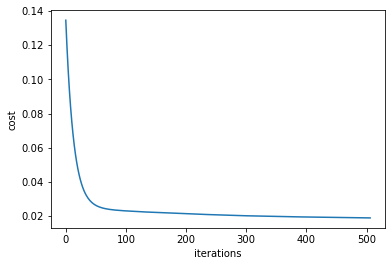

In [8]:
#Gradient descent with lasso regularization
import numpy as np
import matplotlib.pyplot as plt

#loading lasso data
ldata = np.loadtxt('data.txt')
X = np.array(ldata[:, 1:16])
y = np.array(ldata[:, 16], ndmin=2).T

# The number of features.
n = X.shape[1]

#Feature normalisation
for i in range(n):
    X[:, i] = ( X[:, i]-np.min(X[:, i]) ) / ( np.max(X[:, i])-np.min(X[:, i]) )
y = ( y-np.min(y) ) / ( np.max(y)-np.min(y) )

#Train and test data features partitioning
ltrain_X = X[0:48, :]
ltest_X = X[48:60, :]

#Train and test data labels partioning
ltrain_y = y[0:48]
ltest_y = y[48:60]

m = ltrain_X.shape[0]

# Add 1s into the feature matrix.
ltrain_X = np.concatenate( (np.ones((m,1)), ltrain_X), axis=1 )

#Adding 1s into test data features matrix
s = ltest_X.shape[0]
ltest_X = np.concatenate( (np.ones((s,1)), ltest_X), axis=1 )

para = np.zeros((n+1,1))
lr = 0.01
ep = 0.001
la = 1

#Train data loss function with regularisation
def loss(X, y, para, la):
    #creating a ones vector to be used in summing parameters
    n = X.shape[1]
    temp_paras = np.ones((n,1))
    
    #calculation of loss function
    part = y-np.dot(X, para)
    cost = 1/(2*m)*np.dot(part.T, part) + la/(2*m)*np.dot(temp_paras.T, para)
    return cost.item()

#Squared loss without regularisation
def test_loss(X, y, para):
    part = y-np.dot(X, para)
    testLoss = 1/(2*m)*np.dot(part.T, part)
    return testLoss.item()

# The gradient algorithm.
def gradientDescent(X, y, lr, ep, la):
    m = X.shape[0]
    n = X.shape[1]
    para = np.zeros((n,1))
    new_para = np.zeros((n,1))
    costHistory = []
    costHistory.append(loss(X, y, para, la))
    k = 0
    while True:
        h = (np.dot(X, para)-y).T # compute the predictions of all training examples.

        for j in range(n):
            grad = 1/m*np.dot(h, X[:, j]) + la/(2*m)*(1.0 if para[j] >= 0 else -1.0)
            new_para[j] = para[j] - lr*grad # note here I store the new paratemeters in a new vector.
        para = new_para
        
        para = new_para
        costHistory.append(loss(X, y, para, la))
        k = k+1
        # convergence critrion
        if abs(costHistory[k-1]-costHistory[k])*100/costHistory[k-1] < ep:
            break
    return costHistory, para

lcost, lpara = gradientDescent(ltrain_X, ltrain_y, lr, ep, la)
ltestLoss = test_loss(ltest_X, ltest_y, lpara)

#Printing lasso parameters and finding count of 0 parameters
count = 0
x =lpara.shape[0]
print("Lasso parameters:")
for i in range(x):
    print("%0.5f" % lpara[i, 0])
    if np.abs(lpara[i, 0]) < 0.01:
        count += 1
print("Number of zero parameters in lasso:", count)
print("Sqaured loss for lasso:", ltestLoss)
print("\nLasso graph:")
plt.plot(lcost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()